# Homework 8

In this homework...

* Revisit the experimental data for the bandgap of PbS quantum dots versus size

* Perform polynomial fits to the data and use Bayes Information Criterion to select the best-fit model

* Tranform the data using a logarithm and repeat the model-selection routine and identify the best-fit model among all of the candidates

In [1]:
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import scipy.special as sp

In [2]:
def f_dist(w, r1, r2):
    r"""
    f_dist - F-Distribution for the distribution of the ratio of variances

    :param w: w parameter in the F-distribution
    :param r1: Degrees of freedom 1 
    :param r2: Degrees of freedom 2
    
    :return: f_val - Value of the F-Distribution
    """

    f_val = sp.gamma((r1 + r2) / 2) * (r1 / r2) ** (r1 / 2) * w ** (r1 / 2 - 1) / (
        sp.gamma(r1 / 2) * sp.gamma(r2 / 2) * (1 + r1 * w / r2) ** ((r1 + r2) / 2))


    return f_val

In [3]:
data = np.loadtxt(open("bandgap.csv", "rb"), delimiter=",", skiprows=0)
size = data[:,0]
bandgap = data[:,1:]

Problem Statement
-----------------------

1. Load the bandgap data. Note that column 0 is the particle size (nm) and the remaining columns are individual measurements of the bandgap (eV) at each particle size. Calculate the mean bandgap at each particle size. Plot the individual measurements and mean bandgaps vs. particle size.

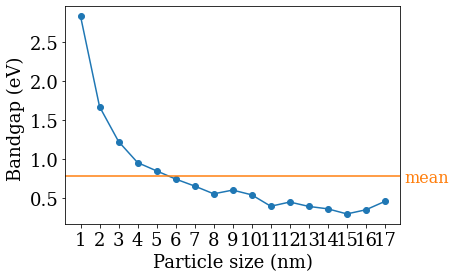

In [4]:
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

mean = np.mean(bandgap)
means = []
sizes = []
for i in range(len(size)):    
    bandgap_mean = np.mean(data[i:i+1,1:])
    means.append(bandgap_mean)
    sizes.append(i+1)
plt.plot(sizes, means,color = 'C0')
plt.axhline(y=np.mean(means),color = 'C1')
plt.text(18,0.7 ,'mean', color = 'C1', fontsize=16)
plt.scatter(sizes, means)
plt.xlabel("Particle size (nm)")
plt.ylabel("Bandgap (eV) ")
plt.xticks(sizes,sizes)
plt.show()

[2.82769278 1.67036072 1.22432588 0.95503415 0.84911511 0.74465319
 0.65500581 0.55582026 0.60363733 0.54258952 0.39688593 0.4507408
 0.39459238 0.36351165 0.29873116 0.35148194 0.45903226]


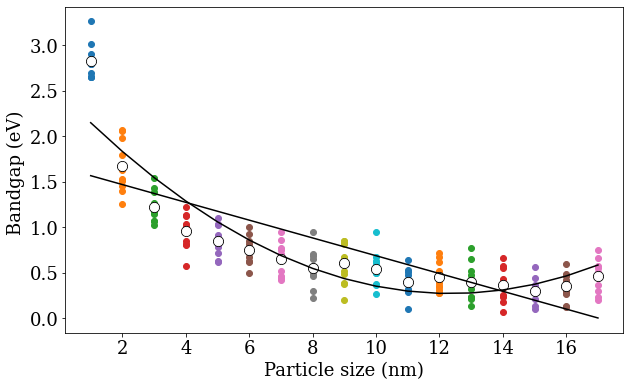

In [8]:
t = size
m = np.zeros(len(t))

ne = len(t)
ni = len(bandgap[0])
n = ne * ni
sse = 0

plt.figure(figsize=(10, 6))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_t in range(len(t)):
    m[i_t] = np.mean(bandgap[i_t])
    sse += np.sum((bandgap[i_t] - m[i_t]) ** 2)
    
    plt.scatter(t[i_t] + np.zeros(ni), bandgap[i_t])

print(m)

order_vec = np.array([1, 2, 3, 4, 5, 6, 7])
bic = np.zeros(len(order_vec))

for i_order in range(len(order_vec)):
    order = order_vec[i_order]
    poly = np.polyfit(t, m, order)
    mfit = np.polyval(poly, t)
    if order < 3:
        plt.plot(t, mfit, 'k-')
    ssf = ni * np.sum((m - mfit) ** 2)
    r1 = ne - (order + 1)
    r2 = n - ne
    w = (ssf / r1) / (sse / r2)
    f_order = f_dist(w, r1, r2)
    bic[i_order] = -2 * np.log(f_order) + (order + 1) * np.log(n)
    

plt.scatter(t, m, s = 100, color = 'k')
plt.scatter(t, m, s = 70, color = 'w')


plt.xlabel("Particle size (nm)")
plt.ylabel("Bandgap (eV) ")

#plt.savefig('figures/model_define/model_compare.pdf', bbox_inches='tight')    
plt.show()

2. Generate polynomial fits to the plot of mean bandgap vs. particle size using polynomial orders from 1 (linear) to 7. Calculate the Bayes Information Criterion (BIC) for each of these fits. Plot the BIC vs. order of the polynomial fits.

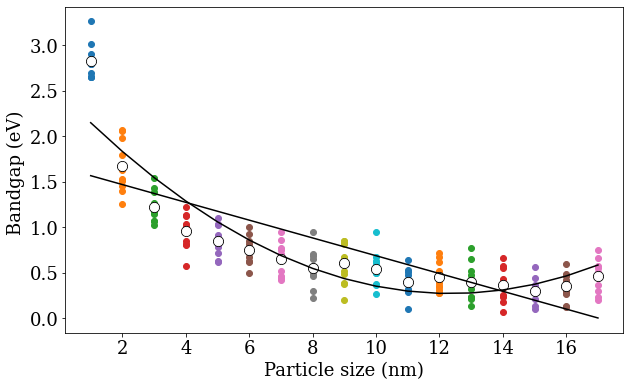

In [9]:
t = size
m = np.zeros(len(t))

ne = len(t)
ni = len(bandgap[0])
n = ne * ni
sse = 0

plt.figure(figsize=(10, 6))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_t in range(len(t)):
    m[i_t] = np.mean(bandgap[i_t])
    sse += np.sum((bandgap[i_t] - m[i_t]) ** 2)
    
    plt.scatter(t[i_t] + np.zeros(ni), bandgap[i_t])

order_vec = np.array([1, 2, 3, 4, 5, 6, 7])
bic = np.zeros(len(order_vec))

for i_order in range(len(order_vec)):
    order = order_vec[i_order]
    poly = np.polyfit(t, m, order)
    mfit = np.polyval(poly, t)
    if order < 3:
        plt.plot(t, mfit, 'k-')
    ssf = ni * np.sum((m - mfit) ** 2)
    r1 = ne - (order + 1)
    r2 = n - ne
    w = (ssf / r1) / (sse / r2)
    f_order = f_dist(w, r1, r2)
    bic[i_order] = -2 * np.log(f_order) + (order + 1) * np.log(n)
    
    
plt.scatter(t, m, s = 100, color = 'k')
plt.scatter(t, m, s = 70, color = 'w')


plt.xlabel("Particle size (nm)")
plt.ylabel("Bandgap (eV) ")

#plt.savefig('figures/model_define/model_compare.pdf', bbox_inches='tight')    
plt.show()

[274.29461247 153.30988358  92.3716124   36.2983863   33.44876178
  36.84668705  42.30125248]


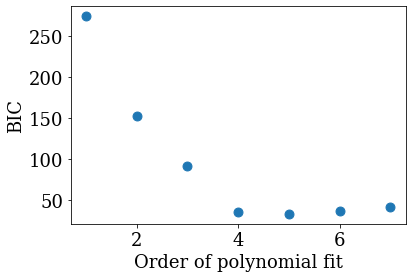

In [10]:
print(bic)
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.scatter(order_vec, bic, s = 80)

plt.xlabel('Order of polynomial fit')
plt.ylabel('BIC')

#plt.savefig('figures/model_define/bic.pdf', bbox_inches='tight')    
plt.show()

3. Tranform the data by taking the log of both the particle size and the bandgap. Plot individual measurements and mean bandgaps, this time using logarithmic axes.

In [11]:
for i in range(0,len(size)):    
    bandgap_mean = np.log(np.mean(data[i:i+1,1:]))
    print(str(np.log(i+1)) + '   ' + str(bandgap_mean))

0.0   1.0394611065401307
0.6931471805599453   0.5130396045043163
1.0986122886681098   0.20239039000946826
1.3862943611198906   -0.04600817629888708
1.6094379124341003   -0.1635605218882597
1.791759469228055   -0.2948366802555135
1.9459101490553132   -0.4231111733853162
2.0794415416798357   -0.5873103066518311
2.1972245773362196   -0.5047817142622328
2.302585092994046   -0.6114021962760563
2.3978952727983707   -0.9241063782090855
2.4849066497880004   -0.7968628365990355
2.5649493574615367   -0.9299019931685863
2.6390573296152584   -1.0119439209083996
2.70805020110221   -1.2082112385306447
2.772588722239781   -1.045596935606389
2.833213344056216   -0.7786347840158014


[ 1.03758127  0.50057261  0.19443004 -0.06514109 -0.18089116 -0.31246185
 -0.45734869 -0.6540649  -0.587343   -0.66408975 -1.01255425 -0.85267158
 -1.05183138 -1.15920042 -1.30623376 -1.14875338 -0.8557929 ]


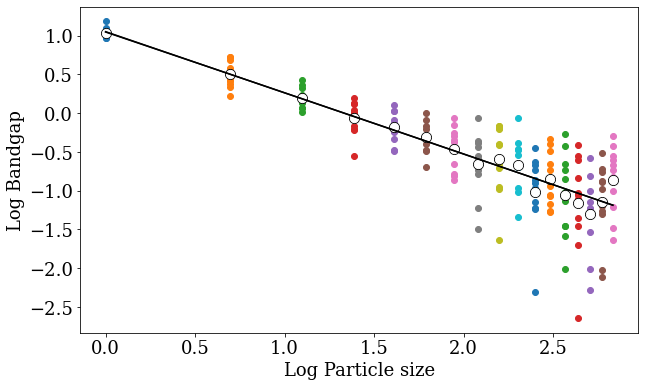

In [13]:
t = np.log(size)
log_bandgap = np.log(bandgap)
m = np.zeros(len(t))

ne = len(t)
ni = len(log_bandgap[0])
n = ne * ni
sse = 0

plt.figure(figsize=(10, 6))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_t in range(len(t)):
    m[i_t] = np.mean(log_bandgap[i_t])
    sse += np.sum((log_bandgap[i_t] - m[i_t]) ** 2)
    
    plt.scatter(t[i_t] + np.zeros(ni), log_bandgap[i_t])

print(m)

order_vec = np.array([1, 2, 3, 4, 5, 6, 7])
bic = np.zeros(len(order_vec))

for i_order in range(len(order_vec)):
    order = order_vec[i_order]
    poly = np.polyfit(t, m, order)
    mfit = np.polyval(poly, t)
    if order < 3:
        plt.plot(t, mfit, 'k-')
    ssf = ni * np.sum((m - mfit) ** 2)
    r1 = ne - (order + 1)
    r2 = n - ne
    w = (ssf / r1) / (sse / r2)
    f_order = f_dist(w, r1, r2)
    bic[i_order] = -2 * np.log(f_order) + (order + 1) * np.log(n)
    
plt.scatter(t, m, s = 100, color = 'k')
plt.scatter(t, m, s = 70, color = 'w')


plt.xlabel("Log Particle size")
plt.ylabel("Log Bandgap")

#plt.savefig('figures/model_define/model_compare.pdf', bbox_inches='tight')    
plt.show()

4. Generate polynomial fits to the plot of log-transformed mean bandgap vs. log-transformed particle size, again using polynomial orders ranging from 1 (linear) to 7. Determine the BIC for each of these fits. Plot the BIC vs. order of the polynomial fits.

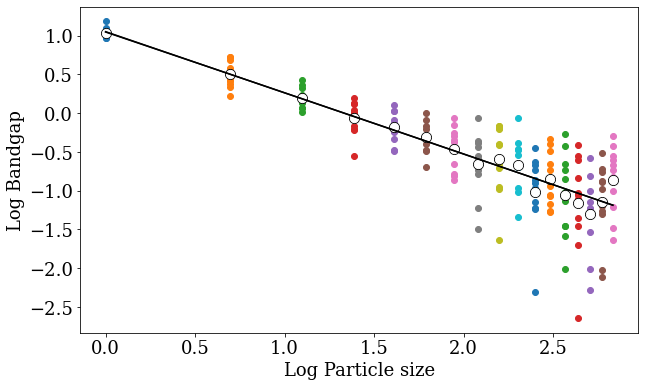

In [14]:
t = np.log(size)
log_bandgap = np.log(bandgap)
m = np.zeros(len(t))

ne = len(t)
ni = len(log_bandgap[0])
n = ne * ni
sse = 0

plt.figure(figsize=(10, 6))
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

for i_t in range(len(t)):
    m[i_t] = np.mean(log_bandgap[i_t])
    sse += np.sum((log_bandgap[i_t] - m[i_t]) ** 2)
    
    plt.scatter(t[i_t] + np.zeros(ni), log_bandgap[i_t])

order_vec = np.array([1, 2, 3, 4, 5, 6, 7])
bic = np.zeros(len(order_vec))

for i_order in range(len(order_vec)):
    order = order_vec[i_order]
    poly = np.polyfit(t, m, order)
    mfit = np.polyval(poly, t)
    if order < 3:
        plt.plot(t, mfit, 'k-')
    ssf = ni * np.sum((m - mfit) ** 2)
    r1 = ne - (order + 1)
    r2 = n - ne
    w = (ssf / r1) / (sse / r2)
    f_order = f_dist(w, r1, r2)
    bic[i_order] = -2 * np.log(f_order) + (order + 1) * np.log(n)
    
    
plt.scatter(t, m, s = 100, color = 'k')
plt.scatter(t, m, s = 70, color = 'w')


plt.xlabel("Log Particle size")
plt.ylabel("Log Bandgap")

#plt.savefig('figures/model_define/model_compare.pdf', bbox_inches='tight')    
plt.show()

[11.03751304 16.67547955 22.25563728 27.26133165 31.7945254  36.73005477
 42.04238663]


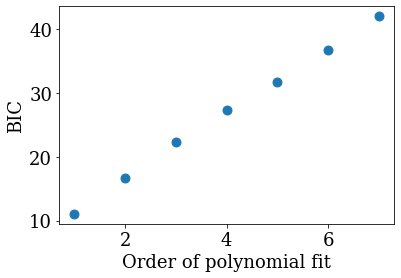

In [15]:
print(bic)
plt.figure()
font = {'family' : 'serif',
        'weight':'normal',
        'size': 18}
plt.rc('font', **font)

plt.scatter(order_vec, bic, s = 80)

plt.xlabel('Order of polynomial fit')
plt.ylabel('BIC')

#plt.savefig('figures/model_define/bic.pdf', bbox_inches='tight')    
plt.show()

5. Based on your results, identify the best-fit model among all candidates (i.e. polynomial fit with and without logarithmic transformation). Justify this choice based on guidelines provided in lecture.

**The best-fit model selection is based on identifying the minimal value of BIC$_{n}$.**

**After running all candidate models, the best-fit models with/without log are:**\
Without log: 5th order with a BIC = 33.44876178\
With log: 1st order with a BIC = 11.03751304

**Thus, 1st order with log and BIC = 11.03751304 is the best-fit model**

6. **THOUGHT QUESTION:** In the class example applying Bayes' Theorem to COVID-19 testing, you saw that due to an imbalance in the prior, even a low false positive rate can result a large portion of positive tests returned from healthy individuals. One way to reduce the false positive rate would be to increase the threshold required by the test to return a positive result – however, this comes at the expense of an increased false negative rate. Often times when designing tests there is a trade-off between false positive and false negative rates. Describe a scenario where you would accept a higher false positive rate for a lower false negative rate. Describe another scenario where you would accept a higher false negative rate for a lower false positive rate.

**A scenario where a higher false positive rate was accepted for a lower false negative rate**\
When the infection rate in the population is very high, the negative rate will drops dramatically, meaning that the percentage of people who test negative are actually not infected is at a very low level (and the false negative rate rises accordingly), in that case, we accept a higher false positive rate for a lower false negative rate, so that the accuracy of people are actually not infected and tested negative is more higher.

**A scenario where a higher false negative rate was accepted for a lower false positive rate**\
When the infection rate in the population is very low, the positive rate will drops dramatically, meaning that the percentage of people who test positive are actually infected is at a very low level (and the false positive rate rises accordingly), in that case, we accept a higher false negative rate for a lower false positive rate, so that the accuracy of people are actually infected and tested positive is more higher.